In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
areabounds = gpd.read_file('../data/Neighborhood.geojson')
areabounds

,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,East Hill,"MULTIPOLYGON (((-86.74659 36.20376, -86.74559 ..."
4,Cleveland Park,"MULTIPOLYGON (((-86.75606 36.18857, -86.75600 ..."
...,...,...
283,River Plantation III,"MULTIPOLYGON (((-86.94600 36.06871, -86.94605 ..."
284,Porter Heights,"MULTIPOLYGON (((-86.70929 36.18842, -86.70942 ..."
285,Avondale Park,"MULTIPOLYGON (((-86.98693 36.07718, -86.98672 ..."
286,Travis Trace,"MULTIPOLYGON (((-87.01880 36.08394, -87.01866 ..."


In [3]:
type(areabounds)

geopandas.geodataframe.GeoDataFrame

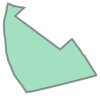

In [4]:
areabounds.loc[0,'geometry']

<AxesSubplot:>

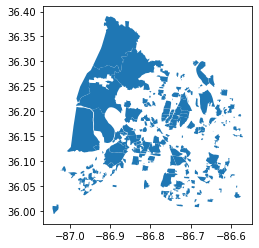

In [5]:
areabounds.plot()

In [6]:
projects = pd.read_csv('../data/Building_Permits_Issued.csv')
projects

C:\Users\pfbab\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2021027259,Building Residential Rehab Storm Damage,Single Family Residence,14710001600,04/30/2021,06/21/2021,40000.0,5045 SUTER DR,NASHVILLE,TN,37211.0,LOT 241 SEC 5 CALDWELL COUNTRY ESTATES,"ERT, LLC.",CARL,CAA01R301,3977347,to conduct general repairs to existing residen...,26.0,37018902.0,"5045 SUTER DR\nNASHVILLE, TN 37211\n(36.068916..."
1,2021021204,Building Residential - New,Single Family Residence,07112039200,04/07/2021,05/05/2021,292188.0,1807 JOY CIR,NASHVILLE,TN,3720.0,LOT 54 JOYWOOD SUB,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963014,to construct a single family residence with 24...,5.0,37011300.0,"1807 JOY CIR\nNASHVILLE, TN 03720\n(36.202582,..."
2,2021028110,Building Commercial - Rehab,"Retail, Department / Retail Stores",11801004500,05/05/2021,06/21/2021,234501.0,2707 12TH AVE S,NASHVILLE,TN,37204.0,PT LOT 21 DR E.T. NOEL SUB,"DOWDLE CONSTRUCTION GROUP, LLC",CACR,CAF20M001,3979526,TO CONDUCT INTERIOR RENOVATIONS FOR NEW TENANT...,18.0,37016900.0,"2707 12TH AVE S\nNASHVILLE, TN 37204\n(36.1226..."
3,2021024715,Building Residential - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",14900037300,04/21/2021,06/21/2021,1001442.0,2760 MURFREESBORO PIKE 38-44,ANTIOCH,TN,37013.0,PT LOT 1 FOREST VIEW NORTH AND ACREAGE TRACT,BACAR CONSTRUCTORS INC,CARN,CAA03R399,3970804,To construct townhome units 38-44. 7 2 bedroo...,29.0,37015620.0,"2760 MURFREESBORO PIKE 38-44\nANTIOCH, TN 3701..."
4,2021027119,Building Sign Permit,Sign - Ground / Wall Signs,10701000100,04/30/2021,05/05/2021,5000.0,1717 ELM HILL PIKE,NASHVILLE,TN,37210.0,LOT 44 REV SEC 36 & 19 METRO IND PARK,BOOM SIGN AND LIGHTING,CASN,CAZ02A001,3976785,to erect 57SF illuminated monument sign for Th...,15.0,37019600.0,"1717 ELM HILL PIKE\nNASHVILLE, TN 37210\n(36.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34202,2020076228,Building Commercial - Rehab,"General Office, Professional Services",10408032700,12/07/2020,03/18/2021,20000.0,1513 16TH AVE S,NASHVILLE,TN,37212.0,LOT 2 O B HAYES ROKEBY ADDITION RESUB PT LOTS ...,"STACKER BUILDING GROUP, LLC",CACR,CAD02B016,3903060,partial demo of rear wall and finish \nPOC HAM...,17.0,37016400.0,"1513 16TH AVE S\nNASHVILLE, TN 37212\n(36.1385..."
34203,2020030131,Building Commercial - New,"Leasing / Sales Office, Other",09211005700,05/13/2020,09/30/2020,201675.0,1825 PEARL ST,NASHVILLE,TN,37203.0,LOT 14 POWER SUB,"DUNAWAY CONSTRUCTION, LLC",CACN,CAD03B000,3817298,To locate a temporary 24 x 68 modular medical ...,21.0,37014400.0,"1825 PEARL ST\nNASHVILLE, TN 37203\n(36.158405..."
34204,2020074858,Building Demolition Permit,Demolition Permit - Residential,10507032600,12/01/2020,12/21/2020,10000.0,1611 MARTIN ST,NASHVILLE,TN,37203.0,W SIDE MARTIN ST N OF SOUTHGATE AVE,PALMETTO CONSTRUCTION LLC,CADM,CAZ01A001,3900938,to demolish existing single family residence. ...,17.0,37016100.0,"1611 MARTIN ST\nNASHVILLE, TN 37203\n(36.13666..."
34205,2019055245,Building Commercial - Tenant Finish Out,"Multifamily, Tri-Plex, Quad, Apartments",09314056800,09/12/2019,06/25/2020,1054674.0,805 DIVISION ST,NASHVILLE,TN,37203.0,LOT 1 EDGEHILL EST SEC 65 CONSOLIDATION OF LOT...,"HOAR CONSTRUCTION, LLC",CACT,CAA03R398,3711504,Phase 22 17 apartments for VANTAGE GULCH\nLe...,19.0,37019500.0,"805 DIVISION ST\nNASHVILLE, TN 37203\n(36.1499..."


In [7]:
projects.info()
projecttest = projects.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34207 entries, 0 to 34206
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    34207 non-null  object 
 1   Permit Type Description     34207 non-null  object 
 2   Permit Subtype Description  34207 non-null  object 
 3   Parcel                      34207 non-null  object 
 4   Date Entered                34207 non-null  object 
 5   Date Issued                 34207 non-null  object 
 6   Construction Cost           34206 non-null  float64
 7   Address                     34207 non-null  object 
 8   City                        34206 non-null  object 
 9   State                       34207 non-null  object 
 10  ZIP                         34206 non-null  float64
 11  Subdivision / Lot           34207 non-null  object 
 12  Contact                     34206 non-null  object 
 13  Permit Type                 342

In [8]:
projecttest

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2021027259,Building Residential Rehab Storm Damage,Single Family Residence,14710001600,04/30/2021,06/21/2021,40000.0,5045 SUTER DR,NASHVILLE,TN,37211.0,LOT 241 SEC 5 CALDWELL COUNTRY ESTATES,"ERT, LLC.",CARL,CAA01R301,3977347,to conduct general repairs to existing residen...,26.0,37018902.0,"5045 SUTER DR\nNASHVILLE, TN 37211\n(36.068916..."
1,2021021204,Building Residential - New,Single Family Residence,07112039200,04/07/2021,05/05/2021,292188.0,1807 JOY CIR,NASHVILLE,TN,3720.0,LOT 54 JOYWOOD SUB,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963014,to construct a single family residence with 24...,5.0,37011300.0,"1807 JOY CIR\nNASHVILLE, TN 03720\n(36.202582,..."
2,2021028110,Building Commercial - Rehab,"Retail, Department / Retail Stores",11801004500,05/05/2021,06/21/2021,234501.0,2707 12TH AVE S,NASHVILLE,TN,37204.0,PT LOT 21 DR E.T. NOEL SUB,"DOWDLE CONSTRUCTION GROUP, LLC",CACR,CAF20M001,3979526,TO CONDUCT INTERIOR RENOVATIONS FOR NEW TENANT...,18.0,37016900.0,"2707 12TH AVE S\nNASHVILLE, TN 37204\n(36.1226..."
3,2021024715,Building Residential - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",14900037300,04/21/2021,06/21/2021,1001442.0,2760 MURFREESBORO PIKE 38-44,ANTIOCH,TN,37013.0,PT LOT 1 FOREST VIEW NORTH AND ACREAGE TRACT,BACAR CONSTRUCTORS INC,CARN,CAA03R399,3970804,To construct townhome units 38-44. 7 2 bedroo...,29.0,37015620.0,"2760 MURFREESBORO PIKE 38-44\nANTIOCH, TN 3701..."
4,2021027119,Building Sign Permit,Sign - Ground / Wall Signs,10701000100,04/30/2021,05/05/2021,5000.0,1717 ELM HILL PIKE,NASHVILLE,TN,37210.0,LOT 44 REV SEC 36 & 19 METRO IND PARK,BOOM SIGN AND LIGHTING,CASN,CAZ02A001,3976785,to erect 57SF illuminated monument sign for Th...,15.0,37019600.0,"1717 ELM HILL PIKE\nNASHVILLE, TN 37210\n(36.1..."
5,2021038705,Building Residential - Rehab,Single Family Residence,07404006400,06/18/2021,06/21/2021,60000.0,868 HERMITAGE RDG,HERMITAGE,TN,37076.0,LOT 30 HERMITAGE HILLS SEC. 12,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARR,CAA01R301,4005474,To renovate the existing attached garage and c...,14.0,37015402.0,"868 HERMITAGE RDG\nHERMITAGE, TN 37076\n(36.21..."
6,2021018673,Building Sign Permit,Sign - Ground / Wall Signs,09100004700,03/29/2021,05/05/2021,5400.0,4717 CENTENNIAL BLVD,NASHVILLE,TN,37209.0,S/S JOHN A. MERRITT BV E OF 49TH AVE NO,BOZMAN SIGN CO INC,CASN,CAZ02A001,3956834,"Install a 56 SF illuminated wall sign, BROADST...",20.0,37013300.0,"4717 CENTENNIAL BLVD\nNASHVILLE, TN 37209\n(36..."
7,2021027318,Building Residential - Roofing / Siding,Single Family Residence,10408022600,05/01/2021,05/05/2021,35000.0,1219A 16TH AVE S,NASHVILLE,TN,37212.0,PT LOT 30 HAYES ROKEBY PLAN,"WALLER, R E MASONRY CONSTRUCTION CO",CARK,CAA01R301,3977329,remodel of interior and siding outside on hous...,17.0,37016400.0,"1219A 16TH AVE S\nNASHVILLE, TN 37212\n(36.141..."
8,2021028012,Building Sign Permit,Sign - Ground / Wall Signs,09116002200,05/05/2021,05/05/2021,2140.0,4525 CHARLOTTE AVE,NASHVILLE,TN,37209.0,S E CORNER OF CHARLOTTE AVE & 46TH AVE,JOSLIN SIGN & MAINTENANCE CO INC,CASN,CAZ02A001,3979293,to erect 25Sf non illuminated wall sign and 10...,24.0,37013400.0,"4525 CHARLOTTE AVE\nNASHVILLE, TN 37209\n(36.1..."
9,2021029781,Building Residential - New,Single Family Residence,083140J00100CO,05/12/2021,06/21/2021,272426.0,1809A HOLLY ST,NASHVILLE,TN,37206.0,UNIT A HOMES AT 1809 HOLLY STREET,LEGACY SOUTH BUILDERS LLC,CARN,CAA01R301,3983764,to construct single family home heated/cooled ...,6.0,37012100.0,"1809A HOLLY ST\nNASHVILLE, TN 37206\n(36.17503..."


In [9]:
def splitcell(cell):
    listcell = cell.rsplit('\n')[2].strip('()').replace(' ','').split(',')
    splitpoint = Point(listcell)
    return splitpoint

In [30]:
projecttest['Mapped Location'].str.rsplit('\n', expand=True)[2]

0    (36.068916, -86.738966)
1    (36.202582, -86.760444)
2     (36.122666, -86.79007)
3    (36.068505, -86.632396)
4    (36.144956, -86.710069)
5    (36.211253, -86.631128)
6    (36.163069, -86.844584)
7    (36.141939, -86.793398)
8    (36.152191, -86.841834)
9     (36.17503, -86.737356)
Name: 2, dtype: object

templocdata = pd.DataFrame(projecttest['Mapped Location'].apply(lambda x:x.rsplit('\n')[2].strip('()').replace(' ','').split(',')))
locdata = templocdata['Mapped Location'].apply(pd.Series).rename(columns={0: 'lat', 1: 'long'})
locdata

locdata = []
for proindex, provalue in projecttest.iterrows():
    print("now working on:"+ str(proindex))
    locdata.append(provalue['Mapped Location'].rsplit('\n')[2].strip('()').replace(' ','').split(','))
    
print(locdata)